In [0]:
dbutils.widgets.text("Turbine", "4705")
dbutils.widgets.dropdown("Year", "2010", [str(x) for x in range(2000, 3000)])
dbutils.widgets.dropdown("Month", "6", [str(x) for x in range(1, 13)])

#Data Cleaning,filtering and sanity checking

Importing the required packages

In [0]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import median_abs_deviation as mad
from scipy.stats import ttest_ind as ttest
from datetime import datetime
import dateutil.relativedelta

In [0]:
year = dbutils.widgets.get("Year")
month = dbutils.widgets.get("Month")
turbineSkFk = dbutils.widgets.get("Turbine")

In [0]:
import datetime
import dateutil.relativedelta

date = datetime.datetime(year=int(year), month=int(month), day=1)
startDate = date - dateutil.relativedelta.relativedelta(months=11)

##Converting the spark dataframe into pandas dataframe & visualisation

In [0]:
df = spark.sql(f"select * from asset_life_data where TURBINE_SK_FK={turbineSkFk} and TIME_STAMP between '{startDate.date()}' and '{date.date()}'").toPandas()

In [0]:
df.describe()

Out[6]:

,SITE_SK_FK,TURBINE_SK_FK,Amb_WindSpeed_Avg,Amb_WindSpeed_Max,Blds_BladeA_Load,Blds_BladeA_MaxLoad,Blds_BladeB_Load,Blds_BladeB_MaxLoad,Blds_BladeC_Load,Blds_BladeC_MaxLoad,Rtr_RPM_Avg,Rtr_RPM_Max,Gen_RPM_Avg,Gen_RPM_Max,Grd_Prod_Pwr_Avg,Grd_Prod_Pwr_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,TowerAcc_X_direction_StdXAcc,TowerAcc_X_direction_MaxXAcc,TowerAcc_Y_direction_StdYAcc,TowerAcc_Y_direction_MaxYAcc
count,12594.0,12594.0,12592.000000,12592.000000,1.259400e+04,1.259400e+04,1.259400e+04,1.259400e+04,1.259400e+04,1.259400e+04,12592.000000,12592.00000,12592.000000,12592.000000,12592.000000,12592.000000,12592.000000,12592.000000,12594.000000,12594.000000,12594.000000,12594.000000
mean,272.0,4704.0,6.558815,9.665041,-3.748596e+06,-2.345054e+06,-3.516231e+06,-2.126741e+06,-3.493426e+06,-2.117615e+06,8.802097,10.08476,996.753034,1111.961769,934.496847,1300.082489,3.789279,1.002517,52.759171,197.469589,50.942751,230.967286
std,0.0,0.0,2.750736,3.559409,1.945260e+06,1.475198e+06,1.944209e+06,1.491017e+06,1.883342e+06,1.440615e+06,4.004371,4.24414,453.577762,466.422636,896.446866,1119.020902,17.115709,3.091107,38.636556,138.120915,46.791752,237.814223
min,272.0,4704.0,0.300000,1.100000,-7.663930e+06,-7.157120e+06,-7.286086e+06,-6.833920e+06,-7.269725e+06,-6.762240e+06,0.000000,0.00000,0.000000,0.000000,-67.500000,-67.300000,-2.900000,0.000000,0.000000,-33.000000,0.000000,-16.000000
25%,272.0,4704.0,4.500000,7.000000,-5.507026e+06,-3.393024e+06,-5.245202e+06,-3.208128e+06,-5.204042e+06,-3.132544e+06,6.400000,7.80000,727.500000,871.600000,148.175000,270.275000,-1.800000,0.100000,18.000000,76.000000,19.000000,69.000000
50%,272.0,4704.0,6.400000,9.200000,-3.759290e+06,-2.280896e+06,-3.567866e+06,-2.119552e+06,-3.488994e+06,-2.055328e+06,9.500000,11.10000,1074.550000,1227.050000,637.550000,1000.450000,-1.800000,0.200000,46.000000,184.000000,36.000000,151.000000
75%,272.0,4704.0,8.500000,11.900000,-2.116060e+06,-1.332128e+06,-1.931786e+06,-1.140704e+06,-1.870308e+06,-1.134208e+06,12.400000,13.80000,1403.300000,1517.000000,1619.475000,2427.600000,-0.100000,0.500000,82.000000,296.000000,66.000000,297.000000
max,272.0,4704.0,16.600000,26.700000,1.387661e+06,2.369792e+06,1.659119e+06,2.077888e+06,1.426179e+06,3.283904e+06,13.500000,15.40000,1531.400000,1674.300000,2999.500000,3115.600000,89.700000,45.000000,225.000000,1096.000000,404.000000,1752.000000


Selecting the required features

In [0]:

X_headers = ["Blds_BladeA_Load",
             "Blds_BladeB_Load",
             "Blds_BladeC_Load",
             "Amb_WindSpeed_Avg",
             "Rtr_RPM_Avg",
             "Gen_RPM_Avg",
             "Grd_Prod_Pwr_Avg",
             "TowerAcc_X_direction_StdXAcc",
             "TowerAcc_Y_direction_StdYAcc",
             "Blds_BladeA_MaxLoad",
             "Blds_BladeB_MaxLoad",
             "Blds_BladeC_MaxLoad",
             "Amb_WindSpeed_Max",
             "Rtr_RPM_Max",
             "Gen_RPM_Max",
             "Grd_Prod_Pwr_Max",
             "Blds_PitchAngle_Avg",
             "TowerAcc_X_direction_MaxXAcc",
             "TowerAcc_Y_direction_MaxYAcc"]


In [0]:
df = df[X_headers]

In [0]:
df.describe()

Out[9]:

,Blds_BladeA_Load,Blds_BladeB_Load,Blds_BladeC_Load,Amb_WindSpeed_Avg,Rtr_RPM_Avg,Gen_RPM_Avg,Grd_Prod_Pwr_Avg,TowerAcc_X_direction_StdXAcc,TowerAcc_Y_direction_StdYAcc,Blds_BladeA_MaxLoad,Blds_BladeB_MaxLoad,Blds_BladeC_MaxLoad,Amb_WindSpeed_Max,Rtr_RPM_Max,Gen_RPM_Max,Grd_Prod_Pwr_Max,Blds_PitchAngle_Avg,TowerAcc_X_direction_MaxXAcc,TowerAcc_Y_direction_MaxYAcc
count,1.259400e+04,1.259400e+04,1.259400e+04,12592.000000,12592.000000,12592.000000,12592.000000,12594.000000,12594.000000,1.259400e+04,1.259400e+04,1.259400e+04,12592.000000,12592.00000,12592.000000,12592.000000,12592.000000,12594.000000,12594.000000
mean,-3.748596e+06,-3.516231e+06,-3.493426e+06,6.558815,8.802097,996.753034,934.496847,52.759171,50.942751,-2.345054e+06,-2.126741e+06,-2.117615e+06,9.665041,10.08476,1111.961769,1300.082489,3.789279,197.469589,230.967286
std,1.945260e+06,1.944209e+06,1.883342e+06,2.750736,4.004371,453.577762,896.446866,38.636556,46.791752,1.475198e+06,1.491017e+06,1.440615e+06,3.559409,4.24414,466.422636,1119.020902,17.115709,138.120915,237.814223
min,-7.663930e+06,-7.286086e+06,-7.269725e+06,0.300000,0.000000,0.000000,-67.500000,0.000000,0.000000,-7.157120e+06,-6.833920e+06,-6.762240e+06,1.100000,0.00000,0.000000,-67.300000,-2.900000,-33.000000,-16.000000
25%,-5.507026e+06,-5.245202e+06,-5.204042e+06,4.500000,6.400000,727.500000,148.175000,18.000000,19.000000,-3.393024e+06,-3.208128e+06,-3.132544e+06,7.000000,7.80000,871.600000,270.275000,-1.800000,76.000000,69.000000
50%,-3.759290e+06,-3.567866e+06,-3.488994e+06,6.400000,9.500000,1074.550000,637.550000,46.000000,36.000000,-2.280896e+06,-2.119552e+06,-2.055328e+06,9.200000,11.10000,1227.050000,1000.450000,-1.800000,184.000000,151.000000
75%,-2.116060e+06,-1.931786e+06,-1.870308e+06,8.500000,12.400000,1403.300000,1619.475000,82.000000,66.000000,-1.332128e+06,-1.140704e+06,-1.134208e+06,11.900000,13.80000,1517.000000,2427.600000,-0.100000,296.000000,297.000000
max,1.387661e+06,1.659119e+06,1.426179e+06,16.600000,13.500000,1531.400000,2999.500000,225.000000,404.000000,2.369792e+06,2.077888e+06,3.283904e+06,26.700000,15.40000,1674.300000,3115.600000,89.700000,1096.000000,1752.000000


### visualisation with RAW data

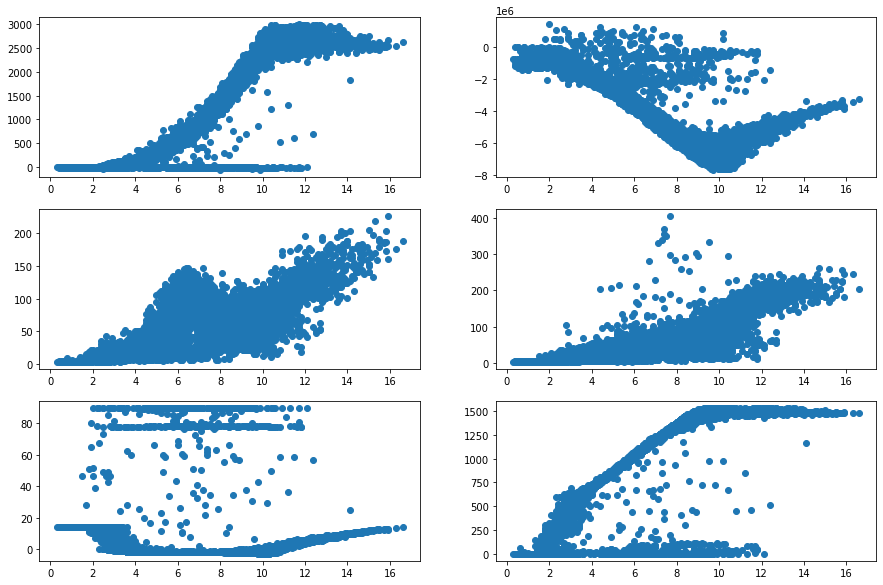

In [0]:
fig,ax = plt.subplots(3,2,figsize=(15,10))
ax[0,0].scatter(df['Amb_WindSpeed_Avg'],df['Grd_Prod_Pwr_Avg'])
ax[0,1].scatter(df['Amb_WindSpeed_Avg'],df['Blds_BladeA_Load'])
ax[1,0].scatter(df['Amb_WindSpeed_Avg'],df['TowerAcc_X_direction_StdXAcc'])
ax[1,1].scatter(df['Amb_WindSpeed_Avg'],df['TowerAcc_Y_direction_StdYAcc'])
ax[2,0].scatter(df['Amb_WindSpeed_Avg'],df['Blds_PitchAngle_Avg'])
ax[2,1].scatter(df['Amb_WindSpeed_Avg'],df['Gen_RPM_Avg'])
plt.show()

##Cleaning and Filtering the data

### Filtering the data
- For power elimination of start/stop and curtailment by windspeed binning and doing linear interpolation
- Gen Speed which is less than 600RPM
- Removing sensor erros based on the limits

In [0]:
def filter_data(df):
  # Dropping the rows which are not a numbers i.e NaN
  df =df.dropna()
  df = df.set_index(np.arange(0,len(df.index),1))
  #creating the windspeed bins for filtering 
  bin_max = 25 #np.max(df['Amb_WindSpeed_Avg'])
  #creating a bin for every 05m/s 
  wspdbin = np.arange(0,bin_max,0.5)
  
  df['spdbins'] = pd.cut(df['Amb_WindSpeed_Avg'],bins=wspdbin)


  #Calculating the mean and standarddeviation of the windspeed and power
  kw_mean = pd.DataFrame(data = (df.groupby('spdbins')['Grd_Prod_Pwr_Avg'].mean())).dropna()
  Ns_mean = (pd.DataFrame(data =df.groupby('spdbins')['Amb_WindSpeed_Avg'].mean())).dropna().to_numpy()
  kw_mad = pd.DataFrame(data =df.groupby('spdbins')['Grd_Prod_Pwr_Avg'].std()).dropna()

  #Calculating the max and the min ranges of the curve to be interpolated.
  kw_min = (kw_mean - kw_mad).to_numpy()
  kw_max = (kw_mean + kw_mad).to_numpy()
  
  #filtering the dataset based on the below listed columns
  columns = ['Grd_Prod_Pwr_Avg','Amb_WindSpeed_Avg','Blds_PitchAngle_Avg','Blds_BladeA_Load','Gen_RPM_Avg','Rtr_RPM_Avg']
  index = df.index
  X=[]
  #Checking conditions for each row
  for x in range(len(index)):
    #filtering for start and stops & curtailment by putting the linear interpolation to the power curve  
    if  df.loc[x,columns[0]] < (np.interp(df.loc[x,columns[1]],Ns_mean.transpose()[-1],kw_min.transpose()[-1],left = 0, right =np.mean(kw_max) )):#Min permitted value
      X.append(x)
    elif df.loc[x,columns[0]] > (np.interp(df.loc[x,columns[1]],Ns_mean.transpose()[-1],kw_max.transpose()[-1],left = 0, right =np.mean(kw_max) )): #Max permitted value
      X.append(x)
    elif (df.loc[x,columns[2]] > 20)  |  ((df.loc[x,columns[1]] < 7)  & (df.loc[x,columns[2]] > 0)) :
      X.append(x) 
    elif (df.loc[x,columns[3]] < -6500000) |(df.loc[x,columns[4]] <600):
      X.append(x)
    elif (df.loc[x,columns[1]] > 10) & (df.loc[x,columns[4]] < 1350)| (df.loc[x,columns[1]] > 10) & (df.loc[x,columns[5]] < 12.4):
          X.append(x)
    else:
      pass
    
  filtered = df.drop(X)
  
  return filtered

###Correcting the data according to the model trained
- Checking if the blade loads are negative and making it positive 
- Converting the accelaration data from Nm to mNm

In [0]:
def correct_data(df):
  Acc = ["TowerAcc_X_direction_StdXAcc","TowerAcc_X_direction_MaxXAcc" ,"TowerAcc_Y_direction_StdYAcc", "TowerAcc_Y_direction_MaxYAcc"]

  loads = ["Blds_BladeA_Load","Blds_BladeA_MaxLoad",	"Blds_BladeB_Load",	"Blds_BladeB_MaxLoad"	,"Blds_BladeC_Load"	,"Blds_BladeC_MaxLoad"]
  
  
  df[Acc] = df[Acc]/1000
  
  df[loads] = df[loads]/-1000
  
  
  return df

  

In [0]:
df = correct_data(filter_data(df))

## visualisation with filtered data

### 1 - vilkoll

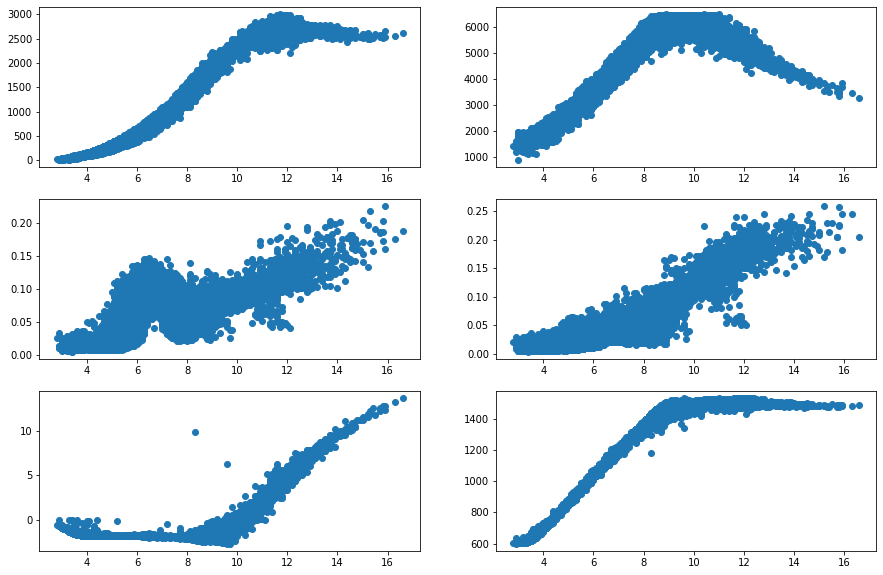

In [0]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(3,2,figsize=(15,10))
ax[0,0].scatter(df['Amb_WindSpeed_Avg'],df['Grd_Prod_Pwr_Avg'])
ax[0,1].scatter(df['Amb_WindSpeed_Avg'],df['Blds_BladeA_Load'])
ax[1,0].scatter(df['Amb_WindSpeed_Avg'],df['TowerAcc_X_direction_StdXAcc'])
ax[1,1].scatter(df['Amb_WindSpeed_Avg'],df['TowerAcc_Y_direction_StdYAcc'])
ax[2,0].scatter(df['Amb_WindSpeed_Avg'],df['Blds_PitchAngle_Avg'])
ax[2,1].scatter(df['Amb_WindSpeed_Avg'],df['Gen_RPM_Avg'])
plt.show()

## Sanity Checking

Loading the trained model dataset

In [0]:
#Initialising the Scaling
x_scaler = StandardScaler()

In [0]:
#Specifying the path of the trained model dataset path
trained_data_path = "/dbfs/FileStore/asset_life/v112_neustadt_dosse_10min.csv"

#Listing the required features from dataset
headers = ["BladeLoadA_mean","BladeLoadB_mean","BladeLoadC_mean","WindSpeed_mean",
            "RotorSpeed_mean","GeneratorSpeed_mean",
            "PowerActive_mean","NacelleAccX_sd","NacelleAccY_sd",
            "BladeLoadA_max","BladeLoadB_max","BladeLoadC_max","WindSpeed_max","RotorSpeed_mean",
            "GeneratorSpeed_max",
            "PowerActive_max","NacelleAccX_max","NacelleAccY_max"]

#reading the file anf filtering required columns
train_df = pd.read_csv(trained_data_path)
train_df = train_df[headers]

#standard scaling the data
train_df1 = x_scaler.fit_transform(train_df)

### Z - test
- Checks for the null hypothesis to be true
- Threshold value is kept as 5% 
- If the value is more than 0.05 it is considered as rejecting null hypothesis
- Checks for the test data by shuffling the train data for 100 times
- Test data size should be less than the train data

In [0]:
def test_nullHP(traindf,testdf):
  
  #Checks the shape the test data
  t_size = testdf.shape[0]
  x = 0
  for i in range(500):
    np.random.shuffle(traindf)
    
    t,test = ztest(traindf[:t_size, : ] , testdf)
    if  (np.mean(test)> 0.05): 
      x += 1 
    else:
      pass
    
  
  return x
  
  

### Checking with RandomForest regression
- x-features[WindSpeed,RotorSpeed,GenSpeed,PowerActivemean] and y-[NacAccXSTD,NacAccYSTD]

In [0]:
def regr(traindf,testdf):
  # loading the Randomforest regressor model of sk learn with defaukt values
  RF_regr = RandomForestRegressor() 
  
  #Splitting for x and y i.e x-features[WindSpeed,RotorSpeed,GenSpeed,PowerActivemean] and y-[NacAccXSTD,NacAccYSTD]
  x = traindf[:, 2:6]
  y = traindf[:, 6:8]
  
  x_test = testdf[:, 2:6] 
  y_test = testdf[:, 6:8]
  
  #Fitting the model
  RF_regr.fit(x,y)
  #Getting prediction with the train dataset
  ypred = RF_regr.predict(x_test)
  
  #Checking for the r2 score
  train_r2 = r2_score(y , RF_regr.predict(x))
  test_r2 = r2_score(y_test , ypred)
  
  #Checking for the MSE
  
  train_mse = mean_squared_error(y , RF_regr.predict(x)) 
  test_mse = mean_squared_error(y_test , ypred)
  
  
#   print('r2\n', train_r2)
#   print(test_r2)
  
#   print('mse\n',train_mse)
#   print(test_mse)
  return train_r2,train_mse, test_r2,test_mse

In [0]:
df.pop('Blds_PitchAngle_Avg')
df.pop('spdbins')
df1 = x_scaler.fit_transform(df)

#count = test_nullHP(train_df.to_numpy(),vilkoll.to_numpy())
train_r2,train_mse, test_r2,test_mse = regr(train_df1,df1)


if (test_r2 > 0.68) and (test_mse < 0.32):
  test = True
else:
  test = False

In [0]:
test_r2

Out[20]: 0.6859361124506804

In [0]:
test_mse

Out[21]: 0.31406388754931963

In [0]:
test

Out[22]: True

In [0]:
dbutils.notebook.exit(test)

True